In [43]:
# From Barbara League via email - loaded in jupyter notebook for feedback facilitation

# This is just a test file to do some twitter parsing, count #, @, and http tags, and calculate the
# Pointwise Mutual Information(PMI) and Semantic Orientation(SO) of terms in the text portion of a
# a tweet.  Right now the output doesn't make any sense.  More filtering of the text is definitely
# needed, along with retweet removal, etc.  Most of this code is from Marco Bonzanini
import nltk
from pprint import pprint
from collections import Counter
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import json
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
# use for creating graphs in notebook
%matplotlib inline 
from nltk import bigrams
import vincent
import operator
import math
# other recommended imports
from __future__ import division # floating point division
import numpy as np
import networkx


In [44]:
# load a test file

filename = 'AtlantaDream052916.out'
tknzr = TweetTokenizer()
punctuation = list(string.punctuation)
#print(punctuation)
stop = stopwords.words('english') + punctuation + ['RT', 'rt', 'via', 'VIA', 'The']
doc_cnt = 0
co = defaultdict(lambda : defaultdict(int))


In [45]:
# Read in positive and negative lexicons

posfile = open('positive-words.txt', 'r')
poswords = []
for word in posfile:
    poswords.append(word.strip())   # remove \n
print('LENGTH OF POSITIVE WORDS: ', len(poswords))
posfile.close()
negfile = open('negative-words.txt', 'r')
negwords = []
for word in negfile:
    negwords.append(word.strip())
print('LENGTH OF NEGATIVE WORDS: ', len(negwords))
negfile.close()


('LENGTH OF POSITIVE WORDS: ', 2041)
('LENGTH OF NEGATIVE WORDS: ', 4818)


In [79]:
# Open twitter file and read in tweets.  Tokenzie, count, and compute PMIs and SO

with open(filename, 'r') as f:
    count_all = Counter()
    count_hash = Counter()
    count_amp = Counter()
    count_http = Counter()
    count_bigrams = Counter()
    count_all_single = Counter()
    for line in f:
        tweet = json.loads(line)
        if doc_cnt < 1:
            print("TWEET TEXT FOR TWEET NUMBER: ", doc_cnt)
            #print(json.dumps(tweet, indent=4))
            pprint(tweet['text'])
        token_tweet = tknzr.tokenize(tweet['text'])
        token_tweet_lower = set([term.lower() for term in token_tweet if term.isalpha()]) # lower case alpha text
        token_single = set(token_tweet_lower)  #for term frequency; 
        terms_hash = [term for term in token_tweet if term.startswith("#")]
        terms_amp = [term for term in token_tweet if term.startswith('@')]
        terms_http = [term for term in token_tweet if term.startswith('http')]
        terms_stop = [term for term in token_tweet_lower if term not in stop]
        terms_bigram = bigrams(terms_stop)
        terms_only = [term for term in token_tweet_lower if term not in stop and
                     not term.startswith(('#','@', 'http'))]
        terms_only_single = set(terms_only)

        # Build co-occurance matrix.  Build co[x][y] which contains the number of times
        # x has been seen in the same tweet as y

        for i in range(len(terms_only) - 1):
            for j in range(i+1, len(terms_only)):
                w1, w2 = sorted([terms_only[i], terms_only[j]])
                if w1 != w2:
                    co[w1][w2] += 1

        #print(terms_all)
        count_all.update(terms_only)
        count_hash.update(terms_hash)
        count_amp.update(terms_amp)
        count_http.update(terms_http)
        count_bigrams.update(terms_bigram)
        count_all_single.update(terms_only_single)
        doc_cnt += 1

    print('MOST COMMON WORDS in: ', filename)
    print(count_all.most_common(15))
    print('MOST COMMON HASH TERMS in: ', filename)
    print(count_hash.most_common(15))
    print('MOST COMMON AMP TERMS in: ', filename)
    print(count_amp.most_common(15))
    print('MOST COMMON HTTP TERMS in: ', filename)
    print(count_http.most_common(15))
    print('MOST COMMON BIGRAMS in: ', filename)
    print(count_bigrams.most_common(15))
    print('MOST COMMON SINGLE WORDS IN: ', filename)
    print(count_all_single.most_common(15)) # this list is the same as "MOST COMMON WORDS in:" at top



('MOST COMMON WORDS in: ', 'AtlantaDream052916.out')
[(u'lead', 161), (u'tv', 89), (u'dream', 89), (u'game', 89), (u'nba', 85), (u'next', 78), (u'travel', 78), (u'south', 77), (u'battle', 77), (u'beats', 69), (u'trim', 69), (u'today', 64), (u'cortijo', 64), (u'points', 62), (u'see', 57)]
('MOST COMMON HASH TERMS in: ', 'AtlantaDream052916.out')
[(u'#RWTD', 184), (u'#WatchMeWork', 101), (u'#WNBA20', 98), (u'#WNBA', 54), (u'#AtlantaDream', 52), (u'#GameDay', 17), (u'#keepitup', 12), (u'#IndianaFever', 9), (u'#ATLDream', 7), (u'#WhatIfTimes', 7), (u'#TrueToAtlanta', 7), (u'#Gamecocks', 7), (u'#True2Atlanta', 7), (u'#CokejamCam', 6), (u'#WhatsYourDream', 6)]
('MOST COMMON AMP TERMS in: ', 'AtlantaDream052916.out')
[(u'@AtlantaDream', 858), (u'@IndianaFever', 372), (u'@NBATV', 239), (u'@WNBA', 162), (u'@Catchin24', 94), (u'@TiffMitch25', 66), (u'@8', 62), (u'@angel_35', 54), (u'@tiphayes3', 49), (u'@FOXSportsSE', 47), (u'@dawnstaley', 42), (u'@PhilipsArena', 37), (u'@GamecockWBB', 32), (u'@

In [77]:
# compare the words in sample file with the words in nltk english words corpus
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [80]:
unusual_words(terms_only) # output seems reasonable given the data domain

[u'points', u'puts']

In [81]:
    # Build list of tuples ((term1, term2), count)
    # Print out 5 most frequent co-occurance terms

    co_max=[]
    for t1 in co:
        t1_max_terms = sorted(co[t1].items(),
                              key=operator.itemgetter(1),
                              reverse=True)[:5]
        for t2, t2_count in t1_max_terms:
            co_max.append(((t1,t2), t2_count))
    terms_max = sorted(co_max, key=operator.itemgetter(1),
                       reverse=True)
    print('CO-OCCURANCE TERMS ARE :')
    print(terms_max[:50])

CO-OCCURANCE TERMS ARE :
[((u'nba', u'tv'), 462), ((u'nba', u'travel'), 462), ((u'nba', u'next'), 462), ((u'nba', u'south'), 462), ((u'next', u'tv'), 462), ((u'next', u'travel'), 462), ((u'next', u'south'), 462), ((u'travel', u'tv'), 462), ((u'south', u'tv'), 462), ((u'south', u'travel'), 462), ((u'battle', u'tv'), 462), ((u'battle', u'travel'), 462), ((u'battle', u'next'), 462), ((u'battle', u'nba'), 462), ((u'battle', u'south'), 462), ((u'lead', u'trim'), 414), ((u'beats', u'trim'), 414), ((u'beats', u'lead'), 414), ((u'dream', u'lead'), 372), ((u'dream', u'points'), 294), ((u'ind', u'w'), 222), ((u'game', u'see'), 216), ((u'lead', u'points'), 210), ((u'denise', u'inspiring'), 180), ((u'day', u'game'), 180), ((u'game', u'stop'), 180), ((u'gameckck', u'thing'), 174), ((u'gameckck', u'see'), 174), ((u'gameckck', u'stop'), 174), ((u'gameckck', u'meeting'), 174), ((u'gameckck', u'nation'), 174), ((u'nation', u'thing'), 174), ((u'nation', u'see'), 174), ((u'nation', u'stop'), 174), ((u'st

In [82]:
# Compute word and co-word probabilities = number of documents containing a word/total docs

prob_t = {}
prob_t_co = defaultdict( lambda : defaultdict(int))
for term, n in count_all_single.items():
    prob_t[term] = n/doc_cnt
    for t2 in co[term]:
        prob_t_co[term][t2] = co[term][t2]/doc_cnt


In [83]:
# Compute PMI of each pair of terms = log(P(t1^t2)/(P(t1)*P(t2))
# The chosen measure of “closeness” is Pointwise Mutual Information (PMI)
pmi = defaultdict(lambda : defaultdict(int))
for t1 in prob_t:
    for t2 in co[t1]:
        denom = (prob_t[t1] * prob_t[t2]) + 1
        #pmi[t1][t2] = math.log2(prob_t_co[t1][t2]/denom) log2 is a python 3.* in python 2.* use log(x, 2)
        pmi[t1][t2] = math.log((prob_t_co[t1][t2]/denom), 2)

In [84]:
# Compute Semantic Orientation of each term = sum(PMI(t, posword)) - sum(PMI(t,negword))
# define the Semantic Orientation (SO) of a word as the difference between its 
# associations with positive and negative words; calculate “how close” a word is 
# with terms like good and bad. The chosen measure of “closeness” is Pointwise Mutual Information (PMI)
SO = {}
for term,n in prob_t.items():
    pos_assoc = sum(pmi[term][tx] for tx in poswords)
    neg_assoc = sum(pmi[term][tx] for tx in negwords)
    SO[term] = pos_assoc - neg_assoc
    

In [85]:
# Print out top SOs

SO_sorted = sorted(SO.items(), key=operator.itemgetter(1),
                   reverse=True)
top_pos = SO_sorted[:10]
top_neg = SO_sorted[-10:]

print 'Count SOs:', len(SO_sorted)
print 'Top Positive'
pprint(top_pos)
print 'Top Negative'
pprint(top_neg)



Count SOs: 539
Top Positive
[(u'crossover', 27.098893044500848),
 (u'en', 10.032980120904263),
 (u'da', 10.032964859323176),
 (u'erika', 10.032964859323176),
 (u'engelini', 10.032964859323176),
 (u'left', 10.032964311655784),
 (u'announce', 10.032964092588768),
 (u'sisters', 10.032964092588768),
 (u'called', 10.032964092588768),
 (u'tiffany', 9.03296624674631)]
Top Negative
[(u'dream', -20.337997234344616),
 (u'go', -25.929117441309046),
 (u'birthday', -27.098895527258595),
 (u'best', -27.098898375126993),
 (u'first', -28.51396015404138),
 (u'team', -29.098911446031472),
 (u'bucket', -30.098906115451406),
 (u'fever', -31.31821720178584),
 (u'good', -38.13186706809706),
 (u'game', -72.67905864206166)]


((u'lead', u'tv', u'dream', u'game', u'nba', u'next', u'travel', u'south', u'battle', u'beats', u'trim', u'today', u'cortijo', u'points', u'see'), (161, 89, 89, 89, 85, 78, 78, 77, 77, 69, 69, 64, 64, 62, 57))


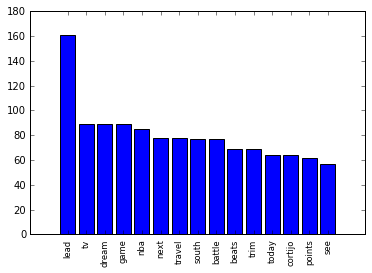

BIGRAMS MOST COMMON ARE 
[((u'nba', u'south'), 77), ((u'next', u'battle'), 77), ((u'battle', u'nba'), 77), ((u'tv', u'travel'), 77), ((u'travel', u'next'), 69)]


In [88]:
#Do some visualization with a bar graph.  First with matplotlib, then Vega

word_freq = count_all.most_common(15)
labels, freq = zip(*word_freq)
print(labels,freq)
plt.bar(range(len(freq)), freq, align='center')
plt.xticks(range(len(freq)), labels, size='small')
locs, names = plt.xticks()
plt.setp(names, rotation=90)
plt.show() # display chart inline
print('BIGRAMS MOST COMMON ARE ')
print(count_bigrams.most_common(5))

# Use Vega scaffold to display bar chart.  Create html file
# then type:  python -m http.server 8888 for Python 3
# then open a broswer and go to http://localhost:8888/chart.html

#data = {'data': freq, 'x':labels}
#bar = vincent.Bar(data, iter_idx='x')
#bar.to_json('term_freq.json')

# NOTE: output illustrates how many of the tweets are commercially generated, for example (https://t.co/tELMFeCgMt):
# NBA TV (Verified account) @NBATV: The @IndianaFever travel South to battle the @AtlantaDream, NEXT on NBA TV!
# The exception is the post about latina player Carla Cortijo (https://t.co/1s2vHgvvgC) posted in spanish, btw.

In [90]:
# TEST TWEET
tweet = 'RT @marcobonzanini: This is a the just an example!!! :D http://example.com #NLP :) 2000 2,000 I DID IT'

tokentweet = tknzr.tokenize(tweet)
print tokentweet

POStag = nltk.pos_tag(tokentweet) #tagging Parts Of Speech POS
print POStag
# note: this emoticon (u':D', 'JJ') is tagged as JJ, an adjective
# note: this emoticon (u':)', 'NNP') is tagged as NNP, a noun, proper, singular
#nltk.help.upenn_tagset('NNP') # to get the abbreviation description

print(punctuation)
print(stop)

[u'RT', u'@marcobonzanini', u':', u'This', u'is', u'a', u'the', u'just', u'an', u'example', u'!', u'!', u'!', u':D', u'http://example.com', u'#NLP', u':)', u'2000', u'2,000', u'I', u'DID', u'IT']
[(u'RT', 'NNP'), (u'@marcobonzanini', 'NN'), (u':', ':'), (u'This', 'DT'), (u'is', 'VBZ'), (u'a', 'DT'), (u'the', 'DT'), (u'just', 'RB'), (u'an', 'DT'), (u'example', 'NN'), (u'!', '.'), (u'!', '.'), (u'!', '.'), (u':D', 'JJ'), (u'http://example.com', 'NN'), (u'#NLP', 'NNP'), (u':)', 'NNP'), (u'2000', 'CD'), (u'2,000', 'CD'), (u'I', 'PRP'), (u'DID', 'VBP'), (u'IT', 'VB')]
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']
[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', 